# Assignment - What's the Weather Like?

## Background

Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"

Now, we know what you may be thinking: _"Duh. It gets hotter..."_

But, if pressed, how would you **provide evidence**?

## WeatherPy

In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a [simple Python library](https://pypi.python.org/pypi/citipy), the [OpenWeatherMap API](https://openweathermap.org/api), and a little common sense to create a representative model of weather across world cities.

Your objective is to build a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

Your final notebook must:

* Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* OPTIONAL: Include a print log of each city as it's being processed with the city number and city name.
* OPTIONAL: Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

* You must complete your analysis using a Jupyter notebook.
* You must use the Matplotlib ,Seaborn or Pandas plotting libraries.
* You must include a written description of three observable trends based on the data.
* You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.

## Hints and Considerations

* The city data is generated based on random coordinates; as such, your outputs will not be an exact match to the provided starter notebook.

* You may want to start this assignment by refreshing yourself on the [geographic coordinate system](http://desktop.arcgis.com/en/arcmap/10.3/guide-books/map-projections/about-geographic-coordinate-systems.htm).

* Next, spend the requisite time necessary to study the OpenWeatherMap API. Based on your initial study, you should be able to answer  basic questions about the API: Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

* A starter code for Citipy has been provided. However, if you're craving an extra challenge, push yourself to learn how it works: [citipy Python library](https://pypi.python.org/pypi/citipy). 

* Lastly, remember -- this is a challenging activity. Push yourself! If you complete this task, then you can safely say that you've gained a strong mastery of the core foundations of data analytics and it will only go better from here. Good luck!
#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [7]:
# Don't modify this cell.
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint
from datetime import date

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# Don't modify this cell
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

598

A lot of starter code has been generated for you. Use the cell below to play with the data to ensure you know what's happening. 

In [41]:
## Abbie's revision of starter code for exploration

# List for holding lat_lngs and cities
lat_lngs2 = [] # Empty list to hold latitudes
cities2 = [] # Empty list to hold cities

# CREATE A SET OF RANDOM LAT AND LNG COMBINATIONS

#### np.random.uniform draws samples from a uniform distribution within a specified range (low to high)

lats2 = np.random.uniform(low=-90.000, high=90.000, size=1500) # latitude has possible range of -90, 90
#lats2 # view sample of lats2 (created an array)

lngs2 = np.random.uniform(low=-180.000, high=180.000, size=1500) # longitude has possible range of -180,180
#lngs2 # view sample of lngs2 (created an array)

# zip() stores pairs of iterable values into a tuple (we are putting lats and longs together to create coordinates)
lat_lngs2 = zip(lats2, lngs2)
#print(type(lat_lngs2)) # Create a zip object; class type is "zip"
#print(tuple(lat_lngs2)) # this will print all the possible tuples/coordinates that we'll use
#print(len(tuple(lat_lngs2))) # verify that the length of this tuple is 1500, as it should be


# IDENTIFY NEAREST CITY FOR EACH LAT, LNG COMBINATION

# We can iterate over our tuple, just like a regular list. We can also index our tuple.

# For every pair within the lat_lngs2 tuple: 
for lat_lng2 in lat_lngs2:
    #print(lat_lng2) # prints the tuples in lat_lngs2
    # print(citipy.nearest_city(lat_lng2[0], lat_lng2[1])) # creates the object
    # add the .city_name attribute to make it useful
    
    # create a variable called "city2", where we call the 'citipy' module to find the city that is closest to the given 
    ## coordinates (index 0 in our list, index 1 in our list). Also grab the city name. 
    city2 = citipy.nearest_city(lat_lng2[0], lat_lng2[1]).city_name
    #print(city2)
    
    # IF THE CITY IS UNIQUE, THEN ADD IT TO OUR CITIES LIST
    
    # If the variable we created earlier (city2) is not already in the previously empty cities2 list above,
        ## then append the value of city2 to that list for us to use later!
    if city2 not in cities2:
        cities2.append(city2)

# PRINT THE CITY COUNT TO CONFIRM SUFFICIENT COUNT

len(cities2) # length is sufficient
print(cities2) # printed list of cities2, just out of curiousity 

# I am pretty sure I understand what is happening, up to this point!

['balkhash', 'albany', 'hermanus', 'lebu', 'ushuaia', 'puerto ayora', 'cidreira', 'constitucion', 'victoria', 'cabo san lucas', 'atuona', 'cheuskiny', 'galveston', 'severo-kurilsk', 'kampot', 'sola', 'pevek', 'airai', 'vung tau', 'vaini', 'pokhara', 'moose factory', 'tuatapere', 'rawson', 'barentsburg', 'ridgecrest', 'mataura', 'kieta', 'portland', 'rikitea', 'hobyo', 'georgetown', 'norwalk', 'thompson', 'jamestown', 'paracatu', 'lichinga', 'new norfolk', 'yulara', 'hamilton', 'bethel', 'hearst', 'saint-philippe', 'porto belo', 'torbay', 'kaeo', 'illoqqortoormiut', 'vanavara', 'meyungs', 'norman wells', 'busselton', 'iberia', 'bluff', 'geraldton', 'port alfred', 'butaritari', 'khorinsk', 'batagay-alyta', 'kapaa', 'acari', 'bom jesus', 'chara', 'crossville', 'sambava', 'barrow', 'dafeng', 'kavieng', 'eastbourne', 'punta arenas', 'manacapuru', 'chuy', 'umzimvubu', 'tuktoyaktuk', 'saint-pierre', 'matagami', 'dikson', 'aykhal', 'kodiak', 'mahebourg', 'puertollano', 'nantucket', 'cockburn t

### Perform API Calls
* Perform a weather check on each city in `cities` using a series of successive API calls. Think: how do you do anything successively?
* Make sure each city in your dataset includes coordinates, country, max temperature, pressure, humidity and wind speed
* Use a try-except to handle errors (they will occur)
* Include a print log of each city as it'sbeing processed (with the city number and city name). City number is just going to count which city is being processed 


In [16]:
# Import my Open Weather api_key from my hw5 folder
from api_keys import api_key

In [4]:
# base url to use
base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key

In [9]:
len(cities)

598

In [14]:
# Our cities list was created in a previous step, called "cities"

# Make a dictionary of terms with keys and empty values (empty list)
city_weather = {'City':[],
              'Country':[],
                'Latitude':[],
                'Longitude':[],
              'Cloudiness':[],
               'Humidity':[],
               'Max Temperature':[],
               'Wind Speed':[],
               'Pressure':[],
               'Date':[],
               'dt':[]}

# # Loop over each city in cities to my city_weather dictionary 

for city in cities:
    base_url="http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
    
    try:
        req = requests.get(base_url + f'&q={city}')
        
        data = req.json() # convert to json file
        
        # add values to our city_weather dictioary
        city_weather['City'].append(data['name'])
        city_weather['Country'].append(data['sys']['country'])
        city_weather['Latitude'].append(data['coord']['lat'])
        city_weather['Longitude'].append(data['coord']['lon'])
        city_weather['Cloudiness'].append(data['clouds']['all'])
        city_weather['Humidity'].append(data['main']['humidity'])
        city_weather['Max Temperature'].append(data['main']['temp_max'])
        city_weather['Wind Speed'].append(data['wind']['speed'])
        city_weather['Pressure'].append(data['main']['pressure'])
        city_weather['Date'].append(date.today().strftime("%Y-%m-%d"))
        city_weather['dt'].append(data['dt'])
        
        print('processing '+ city + " " + str(cities.index(city))) # print city name with the count/index
    
    except:
        print(city + 'not found')
        pass # We want code to continue to the next thing in our loop; we don't want it to just error out and be done

processing biak 0
processing moose factory 1
processing butaritari 2
processing vaini 3
processing rikitea 4
processing arraial do cabo 5
processing norman wells 6
processing new norfolk 7
processing albany 8
processing dikson 9
processing mataura 10
processing busselton 11
processing chokurdakh 12
processing natchez 13
processing oktyabrskiy 14
processing provideniya 15
processing nikolskoye 16
processing port macquarie 17
processing gisborne 18
saleaulanot found
processing mount pleasant 20
processing hasaki 21
processing ahipara 22
processing clyde river 23
processing souillac 24
processing hilo 25
processing punta arenas 26
illoqqortoormiutnot found
processing mehamn 28
processing coquimbo 29
processing port elizabeth 30
karpuninskiynot found
processing alyangula 32
processing piacabucu 33
processing de-kastri 34
processing saldanha 35
processing gamba 36
processing andenes 37
processing badiraguato 38
processing upernavik 39
processing hermanus 40
processing ponta do sol 41
proces

processing chorozinho 346
processing kargasok 347
processing neverkino 348
processing tvrdosin 349
processing marawi 350
processing kudahuvadhoo 351
processing barra do garcas 352
processing walvis bay 353
processing sterling 354
processing uspenka 355
processing saint george 356
processing birjand 357
processing marystown 358
processing nishihara 359
processing alugan 360
processing roma 361
processing baglan 362
processing noumea 363
processing natal 364
processing san cristobal 365
umzimvubunot found
processing jutogh 367
processing hambantota 368
processing hohhot 369
processing tadine 370
processing cocorit 371
processing terenos 372
processing zapolyarnyy 373
processing say 374
processing tekkali 375
processing mocuba 376
processing staffanstorp 377
processing geraldton 378
processing srednekolymsk 379
processing wenling 380
processing baykit 381
processing sao francisco de assis 382
processing goure 383
cumaribonot found
processing boende 385
processing fritzlar 386
processing b

### Convert Raw Data to DataFrame
* Display the DataFrame
* Export the city data into a .csv. Open it up in excel or another program to make sure it looks as expected

In [19]:
# Create a data frame from the city_weather dictionary
weather_df = pd.DataFrame.from_dict(city_weather)
weather_df

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed,Pressure,Date,dt
0,Biak,ID,-0.9131,122.8766,51,82,76.84,0.67,1010,2021-10-16,1634417397
1,Moose Factory,CA,51.2585,-80.6094,75,71,55.40,0.00,1001,2021-10-16,1634417398
2,Butaritari,KI,3.0707,172.7902,33,70,81.50,15.48,1013,2021-10-16,1634417398
3,Vaini,TO,-21.2000,-175.2000,75,83,77.16,9.22,1019,2021-10-16,1634417398
4,Rikitea,PF,-23.1203,-134.9692,19,79,75.16,10.20,1022,2021-10-16,1634417399
...,...,...,...,...,...,...,...,...,...,...,...
539,Ardakān,IR,32.3100,54.0175,4,21,68.38,2.53,1013,2021-10-16,1634417607
540,San Borja,BO,-14.8167,-66.8500,100,61,71.42,5.30,1012,2021-10-16,1634417607
541,Beyneu,KZ,45.3167,55.2000,9,47,53.13,11.88,1022,2021-10-16,1634417607
542,Comodoro Rivadavia,AR,-45.8667,-67.5000,20,31,60.66,16.11,1011,2021-10-16,1634417608


In [20]:
# Save this output to a csv
# Later, we can import the file and create the scatter plots from this, so that we don't have to re-run code
weather_df.to_csv('Weather_API_hw5_data.csv')

### Importing File from Previous Step: Run Code from Here

In [2]:
# Import the data we just saved

# File to Load 
weather_data = "Weather_API_hw5_data.csv"

# Read file and store into Pandas data frame
weather_data_df = pd.read_csv(weather_data)

In [3]:
# Check it imported properly
weather_data_df.head()

# Drop the extra column
weather_data_df.drop('Unnamed: 0', axis=1)

,City,Country,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed,Pressure,Date,dt
0,Biak,ID,-0.9131,122.8766,51,82,76.84,0.67,1010,2021-10-16,1634417397
1,Moose Factory,CA,51.2585,-80.6094,75,71,55.40,0.00,1001,2021-10-16,1634417398
2,Butaritari,KI,3.0707,172.7902,33,70,81.50,15.48,1013,2021-10-16,1634417398
3,Vaini,TO,-21.2000,-175.2000,75,83,77.16,9.22,1019,2021-10-16,1634417398
4,Rikitea,PF,-23.1203,-134.9692,19,79,75.16,10.20,1022,2021-10-16,1634417399
...,...,...,...,...,...,...,...,...,...,...,...
539,Ardakān,IR,32.3100,54.0175,4,21,68.38,2.53,1013,2021-10-16,1634417607
540,San Borja,BO,-14.8167,-66.8500,100,61,71.42,5.30,1012,2021-10-16,1634417607
541,Beyneu,KZ,45.3167,55.2000,9,47,53.13,11.88,1022,2021-10-16,1634417607
542,Comodoro Rivadavia,AR,-45.8667,-67.5000,20,31,60.66,16.11,1011,2021-10-16,1634417608


In [4]:
# Check unique cities just to confirm again 
weather_data_df['City'].nunique() # 543 unique cities in our data frame

543

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Use matplotlib
* Save the plotted figures as .pngs and embed those pngs in your readme file.

#### Latitude vs. Temperature Plot

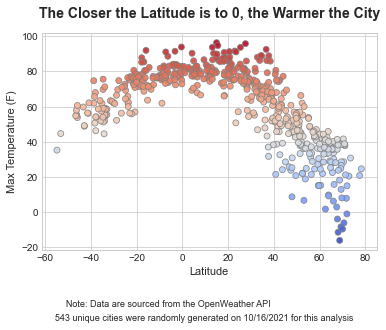

In [103]:
##### Set up empty plotting area
#plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

# Create basic scatter
ax.scatter(weather_data_df['Latitude'], weather_data_df['Max Temperature'],
          c=weather_data_df['Max Temperature'], edgecolors="grey", alpha=0.9, linewidth=0.8, cmap="coolwarm")

# Label the x axis and the y axis
ax.set_xlabel('Latitude', fontsize=11)
ax.set_ylabel('Max Temperature (F)', fontsize=11)

# Set title
plt.title('The Closer the Latitude is to 0, the Warmer the City', fontsize=14, fontweight='bold', pad=15)

# Add data source
plt.figtext(0.655, -0.07, 
            "Note: Data are sourced from the OpenWeather API", 
            ha="right", fontsize=9)

plt.figtext(0.5, -0.12, 
            "543 unique cities were randomly generated on 10/16/2021 for this analysis", 
            ha="center", fontsize=9)
# Show the plot
plt.show()

# Save plot - embedded in ReadMe file on Github
fig.set_size_inches([5,3])
fig.savefig('MaxTemp.png', dpi=150, bbox_inches="tight")

#### Latitude vs. Humidity Plot

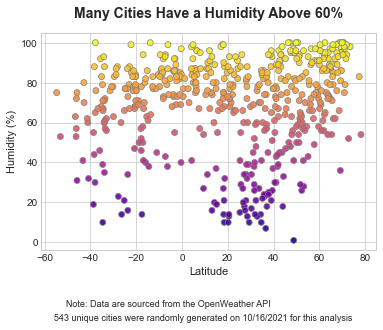

In [104]:
##### Set up empty plotting area
#plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

# Create basic scatter
ax.scatter(weather_data_df['Latitude'], weather_data_df['Humidity'],
          c=weather_data_df['Humidity'], edgecolors="grey", alpha=0.9, linewidth=0.8, cmap="plasma")

# Label the x axis and the y axis
ax.set_xlabel('Latitude', fontsize=11)
ax.set_ylabel('Humidity (%)', fontsize=11)

# Set title
plt.title('Many Cities Have a Humidity Above 60%', fontsize=14, fontweight='bold', pad=15)

# Add data source
plt.figtext(0.655, -0.07, 
            "Note: Data are sourced from the OpenWeather API", 
            ha="right", fontsize=9)

plt.figtext(0.5, -0.12, 
            "543 unique cities were randomly generated on 10/16/2021 for this analysis", 
            ha="center", fontsize=9)
# Show the plot
plt.show()

# Save plot - embedded in ReadMe file on Github
fig.set_size_inches([5,3])
fig.savefig('Humidity.png', dpi=150, bbox_inches="tight")

#### Latitude vs. Cloudiness Plot

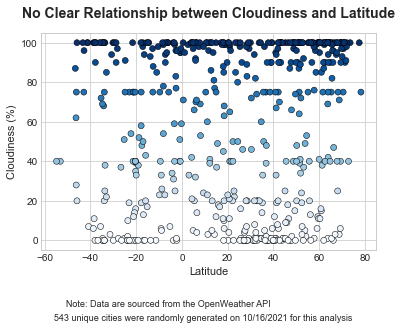

In [113]:
##### Set up empty plotting area
#plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

# Create basic scatter
ax.scatter(weather_data_df['Latitude'], weather_data_df['Cloudiness'],
          c=weather_data_df['Cloudiness'], edgecolors="black", alpha=1, linewidth=0.5, cmap="Blues")

# Label the x axis and the y axis
ax.set_xlabel('Latitude', fontsize=11)
ax.set_ylabel('Cloudiness (%)', fontsize=11)

# Set title
plt.title('No Clear Relationship between Cloudiness and Latitude', fontsize=14, fontweight='bold', pad=15)

# Add data source
plt.figtext(0.655, -0.07, 
            "Note: Data are sourced from the OpenWeather API", 
            ha="right", fontsize=9)

plt.figtext(0.5, -0.12, 
            "543 unique cities were randomly generated on 10/16/2021 for this analysis", 
            ha="center", fontsize=9)
# Show the plot
plt.show()

# Save plot - embedded in ReadMe file on Github
fig.set_size_inches([5,3])
fig.savefig('Cloudiness.png', dpi=150, bbox_inches="tight")

#### Latitude vs. Wind Speed Plot

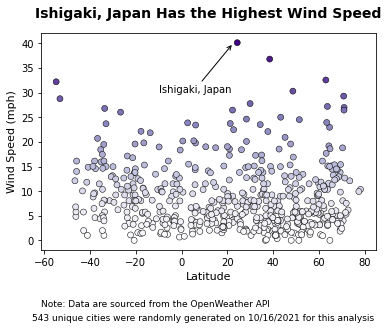

In [14]:
##### Set up empty plotting area
#plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots()

# Create basic scatter
ax.scatter(weather_data_df['Latitude'], weather_data_df['Wind Speed'],
          c=weather_data_df['Wind Speed'], edgecolors="black", alpha=1, linewidth=0.5, cmap="Purples")

# Label the x axis and the y axis
ax.set_xlabel('Latitude', fontsize=11)
ax.set_ylabel('Wind Speed (mph)', fontsize=11)

# Set title
plt.title('Ishigaki, Japan Has the Highest Wind Speed', fontsize=14, fontweight='bold', pad=15)

# Add data source
plt.figtext(0.655, -0.07, 
            "Note: Data are sourced from the OpenWeather API", 
            ha="right", fontsize=9)

plt.figtext(0.5, -0.12, 
            "543 unique cities were randomly generated on 10/16/2021 for this analysis", 
            ha="center", fontsize=9)

#plt.annotate('Ishigaki, Japan', (28, 39.4))
ax.annotate('Ishigaki, Japan', xy=(22.5, 40), xytext=(-10, 30),
arrowprops={'arrowstyle':'->', 'color':'black'})

# Show the plot
plt.show()

# Save plot - embedded in ReadMe file on Github
fig.set_size_inches([5,3])
fig.savefig('Wind.png', dpi=150, bbox_inches="tight")

In [117]:
# Sort by wind speed
weather_data_df.sort_values('Wind Speed', ascending=False)

# The two highest wind speeds are Ishigaki, Japan (40.15) and Ribeira Grande, Portugal (36.82)

,Unnamed: 0,City,Country,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed,Pressure,Date,dt
307,307,Ishigaki,JP,24.3448,124.1572,80,82,77.45,40.15,1016,2021-10-16,1634417516
193,193,Ribeira Grande,PT,38.5167,-28.7000,75,94,70.20,36.82,1004,2021-10-16,1634417460
136,136,Beringovskiy,RU,63.0500,179.3167,100,75,33.24,32.57,999,2021-10-16,1634417442
64,64,Ushuaia,AR,-54.8000,-68.3000,40,75,35.26,32.21,999,2021-10-16,1634417420
291,291,Bonavista,CA,48.6499,-53.1147,100,95,45.12,30.31,1010,2021-10-16,1634417511
...,...,...,...,...,...,...,...,...,...,...,...,...
56,56,Chālūs,IR,36.6550,51.4204,75,82,65.66,0.00,1013,2021-10-16,1634417418
377,377,Ulaanbaatar,MN,47.9077,106.8832,0,78,8.73,0.00,1025,2021-10-16,1634417537
278,278,Fairbanks,US,64.8378,-147.7164,90,88,28.60,0.00,1014,2021-10-16,1634417491
1,1,Moose Factory,CA,51.2585,-80.6094,75,71,55.40,0.00,1001,2021-10-16,1634417398


### Use the Seaborn library to re-create 2-4 of the above plots. 
* Use the same data just make a different plot.
* Note the differences in amount of code required to generate a similar plot.

In [6]:
# Load the necessary module
import seaborn as sns

#### Latitude vs. Max Temperature (Seaborn)

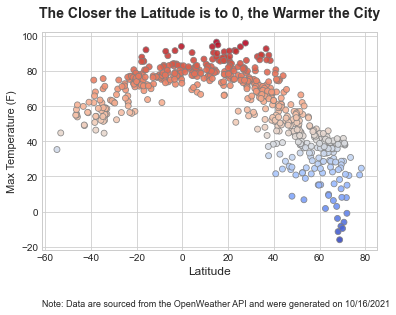

In [173]:
# Build the scatter plot
g = sns.scatterplot(data=weather_data_df,
                    x='Latitude',
                    y='Max Temperature',
                    hue='Max Temperature',
                    palette='coolwarm',
                    alpha=0.9,
                    edgecolor='grey',
                    linewidth=0.8,
                    legend=False)

# Add plot title and adjust the y-axis label to include units
g.set_title('The Closer the Latitude is to 0, the Warmer the City', size=14, weight='bold', pad=15)
g.set_ylabel('Max Temperature (F)', size=11)    

# Add annotation at bottom of plot
plt.figtext(0.93, -0.07, 
            "Note: Data are sourced from the OpenWeather API and were generated on 10/16/2021", 
            ha="right", fontsize=9)

# Display plot
plt.show()

#### Latitude vs. Humidity (Seaborn)

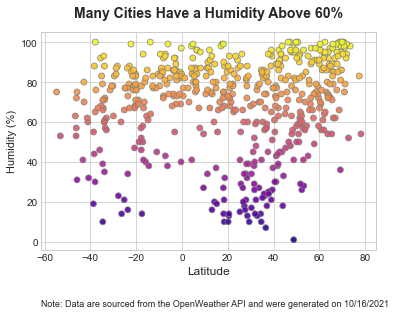

In [174]:
# Build the scatter plot
g = sns.scatterplot(data=weather_data_df,
                    x='Latitude',
                    y='Humidity',
                    hue='Humidity',
                    palette='plasma',
                    alpha=0.9,
                    edgecolor='grey',
                    linewidth=0.8,
                    legend=False)

# Add plot title and adjust the y-axis label to include units
g.set_title('Many Cities Have a Humidity Above 60%', size=14, weight='bold', pad=15)
g.set_ylabel('Humidity (%)', size=11)    

# Add annotation at bottom of plot
plt.figtext(0.93, -0.07, 
            "Note: Data are sourced from the OpenWeather API and were generated on 10/16/2021", 
            ha="right", fontsize=9)

# Display plot
plt.show()

#### Latitude vs. Cloudiness (Seaborn)

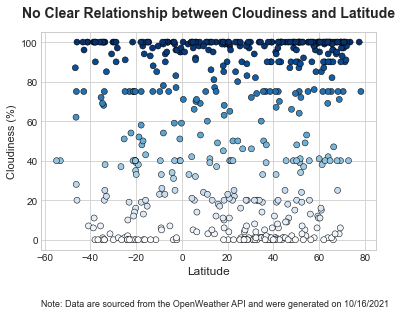

In [178]:
# Build the scatter plot
g = sns.scatterplot(data=weather_data_df,
                    x='Latitude',
                    y='Cloudiness',
                    hue='Cloudiness',
                    palette='Blues',
                    alpha=1,
                    edgecolor='black',
                    linewidth=0.5,
                    legend=False)

# Add plot title and adjust the y-axis label to include units
g.set_title('No Clear Relationship between Cloudiness and Latitude', size=14, weight='bold', pad=15)
g.set_ylabel('Cloudiness (%)', size=11)    

# Add annotation at bottom of plot
plt.figtext(0.93, -0.07, 
            "Note: Data are sourced from the OpenWeather API and were generated on 10/16/2021", 
            ha="right", fontsize=9)

# Display plot
plt.show()

#### Latitude vs. Wind Speed (Seaborn)

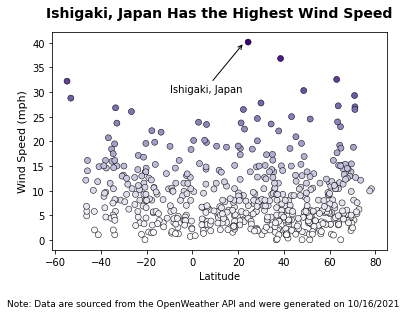

In [13]:
fig, ax = plt.subplots()

# Build the scatter plot
g = sns.scatterplot(data=weather_data_df,
                    x='Latitude',
                    y='Wind Speed',
                    hue='Wind Speed',
                    palette='Purples',
                    alpha=1,
                    edgecolor='black',
                    linewidth=0.5,
                    legend=False)

# Add plot title and adjust the y-axis label to include units
g.set_title('Ishigaki, Japan Has the Highest Wind Speed', size=14, weight='bold', pad=15)
g.set_ylabel('Wind Speed (mph)', size=11)    

# Add annotation at bottom of plot
plt.figtext(0.93, -0.07, 
            "Note: Data are sourced from the OpenWeather API and were generated on 10/16/2021", 
            ha="right", fontsize=9)

# Annotate the city with the highest wind speed
ax.annotate('Ishigaki, Japan', xy=(22.5, 40), xytext=(-10, 30),
arrowprops={'arrowstyle':'->', 'color':'black'})

# Display plot
plt.show()

### As a Data-Scientist:
In addition to generating data, munging data and plotting data you will also be responsible for *interpreting* data. 
* Provide a written description of three observable trends based on the data.

In [9]:
# Get basic stats of weather data
weather_data_df.describe()

,Unnamed: 0,Latitude,Longitude,Cloudiness,Humidity,Max Temperature,Wind Speed,Pressure,dt
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,271.500000,21.905459,21.638225,55.829044,69.150735,60.438217,8.627390,1013.551471,1.634417e+09
std,157.183545,33.189350,89.755717,40.121939,23.157943,21.895016,6.450796,7.930936,7.827840e+01
min,0.000000,-54.800000,-179.166700,0.000000,1.000000,-16.040000,0.000000,985.000000,1.634417e+09
25%,135.750000,-5.383175,-58.844025,12.000000,57.000000,45.112500,3.865000,1010.000000,1.634417e+09
50%,271.500000,27.780100,24.375000,68.000000,75.000000,66.165000,6.900000,1013.000000,1.634417e+09
75%,407.250000,49.899700,101.356575,98.000000,86.000000,77.265000,11.842500,1019.000000,1.634418e+09
max,543.000000,78.218600,179.316700,100.000000,100.000000,96.370000,40.150000,1033.000000,1.634418e+09


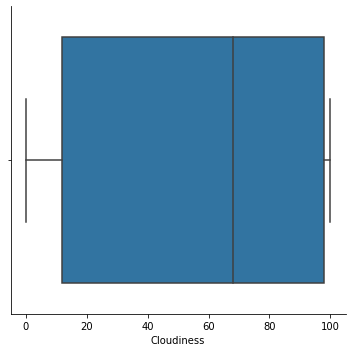

In [12]:
# Simple box plot for visualizing IQR of Cloudiness variable
sns.catplot(x='Cloudiness', data=weather_data_df, kind='box')

# Show plot
plt.show()

### Data Interpretations

1. There is a curvilinear relationship between latitude and maximum temperature in a city. In general, a city's maximum temperature is warmer as the latitude approaches 0.

2. The average humidity of our randomly generated sample is approximately 69%; our scatter plot also indicates that latitude does not seem to have a large influence on the humidity level of a city.

3. The larger innerquartile range suggests that there is wide variability in Cloudiness in our sample. The sample distribution is slightly skewed left and there are cities with maximum (100%) and minimum (0%) possible cloudiness on October 16, 2021

### OPTIONAL Homework Problem: 
* Use a **different** api endpoint such as `Hourly Forecast 4 days` to get data. 
* Other weather api endpoints are documented [here](https://openweathermap.org/api). 
* You will have to change the URL parameters to get the data you want. 
* Get the data into a data structure of your choice. (Pandas, dicts, lists etc...)
* Use the plotting library of your choice to make 1-4 plots of your choice. 

## Note: Did not have time to complete bonus

### Data camp certificates at bottom

In [5]:
# Import my Open Weather api_key from my hw5 folder
from api_keys import api_key

In [9]:
# Selected "Hourly Forecast 2 Days" (I tried 4-day and it was saying a free subscription doesn't cover that)
# Looked up latitude/longitude for St. Louis and added to base URL
# Excluding the minutely forecast and the alerts
# Make sure units are imperial
base_url='https://api.openweathermap.org/data/2.5/onecall?lat=38.627003&lon=-90.199402&exclude=minutely,alerts&units=Imperial'
APIkey = api_key

# Adding my api key to my request
req = requests.get(base_url + f'&appid={APIkey}') 

# print request to confirm it worked
print(req) # 200

# create a json output of the data
json_data = req.json() # request data in json format
print(json_data)

<Response [200]>
{'lat': 38.627, 'lon': -90.1994, 'timezone': 'America/Chicago', 'timezone_offset': -18000, 'current': {'dt': 1634682662, 'sunrise': 1634645642, 'sunset': 1634685422, 'temp': 70.27, 'feels_like': 69.53, 'pressure': 1017, 'humidity': 54, 'dew_point': 52.86, 'uvi': 0, 'clouds': 11, 'visibility': 10000, 'wind_speed': 8.14, 'wind_deg': 166, 'wind_gust': 15.61, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}]}, 'hourly': [{'dt': 1634680800, 'temp': 70.25, 'feels_like': 69.33, 'pressure': 1017, 'humidity': 50, 'dew_point': 50.76, 'uvi': 0.54, 'clouds': 11, 'visibility': 10000, 'wind_speed': 9.75, 'wind_deg': 179, 'wind_gust': 15.46, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'pop': 0}, {'dt': 1634684400, 'temp': 70.27, 'feels_like': 69.53, 'pressure': 1017, 'humidity': 54, 'dew_point': 52.86, 'uvi': 0, 'clouds': 11, 'visibility': 10000, 'wind_speed': 8.14, 'wind_deg': 166, 'wind_gust': 15.61, '

In [50]:
# Start looking through table to see what's what
print(json_data['hourly'][0])
print(json_data['hourly'][1]['temp'])
print(json_data['hourly'][2]['temp'])
print(json_data['hourly'][3]['temp'])
print(json_data['hourly'][4]['temp'])
print(json_data['hourly'][5]['temp'])
print(json_data['hourly'][6]['temp'])
print(json_data['hourly'][7]['temp'])
print(json_data['hourly'][8]['temp'])
print(json_data['hourly'][9]['temp'])

{'dt': 1634680800, 'temp': 70.25, 'feels_like': 69.33, 'pressure': 1017, 'humidity': 50, 'dew_point': 50.76, 'uvi': 0.54, 'clouds': 11, 'visibility': 10000, 'wind_speed': 9.75, 'wind_deg': 179, 'wind_gust': 15.46, 'weather': [{'id': 801, 'main': 'Clouds', 'description': 'few clouds', 'icon': '02d'}], 'pop': 0}
70.27
68.77
66.65
64.09
61.27
58.12
57.31
56.68
56.01


In [60]:
# Start looking at hours (we have a lot of hrs!)
print(json_data['hourly'][0]['humidity'])
print(json_data['hourly'][1]['dt'])
print(json_data['hourly'][2]['dt'])
print(json_data['hourly'][3]['dt'])
print(json_data['hourly'][4]['dt'])
print(json_data['hourly'][5]['dt'])
print(json_data['hourly'][6]['dt'])
print(json_data['hourly'][7]['dt'])
print(json_data['hourly'][8]['dt'])
print(json_data['hourly'][9]['dt'])

50
1634684400
1634688000
1634691600
1634695200
1634698800
1634702400
1634706000
1634709600
1634713200


In [49]:
# Need to create a list of times to loop through; 
time_list = [] # empty list to append times

x = 1634680800 # starting value from 'dt'
while x <= 1635267600: # this is the last value in our output
    x+=3600 # add 3600 because 3600 seconds in 1 hr
    time_list.append(x)

# Check that list works
print(time_list)

[1634684400, 1634688000, 1634691600, 1634695200, 1634698800, 1634702400, 1634706000, 1634709600, 1634713200, 1634716800, 1634720400, 1634724000, 1634727600, 1634731200, 1634734800, 1634738400, 1634742000, 1634745600, 1634749200, 1634752800, 1634756400, 1634760000, 1634763600, 1634767200, 1634770800, 1634774400, 1634778000, 1634781600, 1634785200, 1634788800, 1634792400, 1634796000, 1634799600, 1634803200, 1634806800, 1634810400, 1634814000, 1634817600, 1634821200, 1634824800, 1634828400, 1634832000, 1634835600, 1634839200, 1634842800, 1634846400, 1634850000, 1634853600, 1634857200, 1634860800, 1634864400, 1634868000, 1634871600, 1634875200, 1634878800, 1634882400, 1634886000, 1634889600, 1634893200, 1634896800, 1634900400, 1634904000, 1634907600, 1634911200, 1634914800, 1634918400, 1634922000, 1634925600, 1634929200, 1634932800, 1634936400, 1634940000, 1634943600, 1634947200, 1634950800, 1634954400, 1634958000, 1634961600, 1634965200, 1634968800, 1634972400, 1634976000, 1634979600, 163

In [61]:
# Create an empty dictionary of terms for our data set
STL_forecast={'Time (seconds)':[],
             'Temperature (F)':[],
              'Feels like':[],
              'Humidity (%)':[]}

# Loop over each time in our time_list to our STL_forecast
for time in time_list:
    base_url='https://api.openweathermap.org/data/2.5/onecall?lat=38.627003&lon=-90.199402&exclude=minutely,alerts&units=Imperial'
    
    try:
        req = requests.get(base_url + f'&appid={APIkey}') 
        data = req.json()
        
        STL_forecast['Time (seconds)'].append(data['hourly'][0]['dt'])
        STL_forecast['Temperature (F)'].append(data['hourly'][0]['temp'])
        STL_forecast['Feels like'].append(data['hourly'][0]['feels_like'])
        STL_forecast['Humidity (%)'].append(data['hourly'][0]['humidity'])
        
        
        print('processing '+ str(time))
    
    except:
        print(time + 'not found')
        pass 

print(STL_forecast)

processing 1634684400
processing 1634688000
processing 1634691600
processing 1634695200
processing 1634698800
processing 1634702400
processing 1634706000
processing 1634709600
processing 1634713200
processing 1634716800
processing 1634720400
processing 1634724000
processing 1634727600
processing 1634731200
processing 1634734800
processing 1634738400
processing 1634742000
processing 1634745600
processing 1634749200
processing 1634752800
processing 1634756400
processing 1634760000
processing 1634763600
processing 1634767200
processing 1634770800
processing 1634774400
processing 1634778000
processing 1634781600
processing 1634785200
processing 1634788800
processing 1634792400
processing 1634796000
processing 1634799600
processing 1634803200
processing 1634806800
processing 1634810400
processing 1634814000
processing 1634817600
processing 1634821200
processing 1634824800
processing 1634828400
processing 1634832000
processing 1634835600
processing 1634839200
processing 1634842800
processing

In [52]:
print(STL_forecast)

{'Time (seconds)': [], 'Temperature (F)': [], 'Feels like': [], 'Humidity (%)': []}


## Into to DataViz - Matplotlib

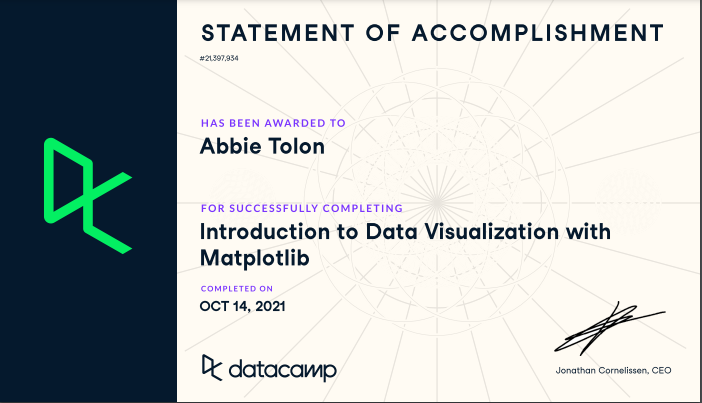

## Intro to DataViz - Seaborn

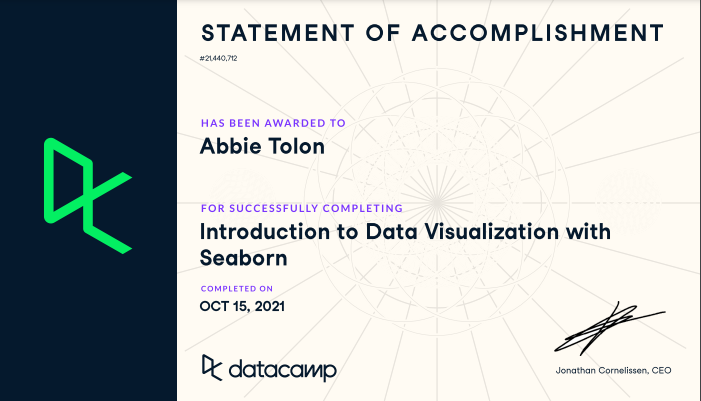